<a href="https://colab.research.google.com/github/Russel-hunho/DeepLearning/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import pandas as pd

# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 디렉토리 내 파일들의 리스트를 뽑을 때 사용
import glob
# 이미지, 오디오, 비디오 등을 표시
import IPython.display as ipd

# MNIST의 손글씨 숫자 이미지 데이터 분류
(https://wikidocs.net/195595)
(https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/tutorials/mnist/beginners/)

### 1. 데이터 전처리

In [ ]:
# MNIST Data 불러오기
glob.glob('./**/*mnist*.*')

['./sample_data/mnist_train_small.csv', './sample_data/mnist_test.csv']

In [ ]:
# Pandas Dataframe으로 저장

# 학습용으로 쓸 data: 19999개
df = pd.read_csv('./sample_data/mnist_train_small.csv')
# 학습 후, test용으로 쓸 data: 9999개
df_test = pd.read_csv('./sample_data/mnist_test.csv')

print(df.shape, df_test.shape) # Data Size 출력
# 785 = 1 + 28*28
  # 1개의 index값(숫자)과, 28*28 size에 해당하는 이미지의 각 픽셀의 흑/백 음영 정도를 나타내는 숫자 기록(0~1사이의 실수)

(19999, 785) (9999, 785)


(10, 28, 28, 1)


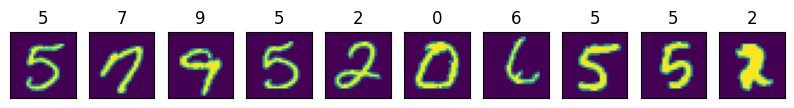

In [ ]:
# 시각화 함수
def imshowTen(imgs,labels):
    fig,axs = plt.subplots(1,10, figsize=(10,2))
    for i, ax in enumerate(axs.flat):
        ax.imshow(imgs.reshape(-1,28,28,1)[i])
          # tensor 내 data를 28*28 픽셀 이미지로 변환하여 저장
        ax.set_title(f"{labels[i]}")
        ax.set_xticks([]) #각 이미지의 xtick(x축 눈금)을 비운다
        ax.set_yticks([]) #각 이미지의 ytick(y축 눈금)을 비운다

#print(df)
# 0열은 숫자(정답), 1열부터는 그 숫자에 해당하는 손글씨 이미지(28X28픽셀)들이 저장되어있음
  # https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/tutorials/mnist/beginners/ 참고

''' 예시로 10개 data만 시각화해보자! '''

data = df.iloc[:10, 1:].to_numpy()
  # 0~9행, 1~끝까지 열만, ndarray로 변환하여 저장: 이미지들만 저장됨!
  # print(type(data), data.shape)
  # print(data)
labels = df.iloc[:10, 0].to_numpy()
  # 0~9행의 0열만, ndarray로 저장
  # print(labels)
    # [5 7 9 5 2 0 6 5 5 2]
imgs = data.reshape(-1,28,28,1)
  # 10*784 data를, 10*28*28*1 tensor 형태로 바꿔줌
print(imgs.shape)
# 시각화
imshowTen(imgs,labels)

### 2. 소프트맥스 회귀
(https://wikidocs.net/60324)
(https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/tutorials/mnist/beginners/)


In [ ]:
# import torch
import torchvision.datasets as dsets
  # 데이터셋 제공
import torchvision.transforms as transforms
  # 전처리 Tool 제공
from torch.utils.data import DataLoader
  # 
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [ ]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [ ]:
''' random seed 고정 '''
# for reproducibility (재현성, seed 고정으로 random 추출 값이 항상 일정해짐)
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
# hyperparameters
training_epochs = 15
batch_size = 100